In [1]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import balanced_accuracy_score

from utils_data_structures import col_prefixes

In [2]:
grouped_df = pd.read_csv('sorare_data/large_cleaned_sorare_data.csv')

grouped_df = grouped_df.fillna(0.0)

print(grouped_df['So_5_Scores_9'].isna().sum())

0


In [3]:
# get dummies for current club
# processed_df = pd.get_dummies(grouped_df, columns=['Current_Club'])
processed_df = grouped_df.drop(columns=['Current_Club'])
le = LabelEncoder()
# processed_df['Position_Encoded'] = le.fit_transform(processed_df['Position'])

columns_to_drop = ['Display_Name', 'First_Name','Last_Name','Player_Number', 'Position']
processed_df = processed_df.drop(columns=columns_to_drop)

processed_df.fillna(0.0)

# pd.set_option('display.max_columns', None)
processed_df.dtypes.value_counts()

float64    308
int64        4
Name: count, dtype: int64

In [4]:
# Create X and y and split into training and testing sets
target_column = 'So_5_Scores_9'
columns_to_drop = [f'{col}_9' for col in col_prefixes]

X = processed_df.drop(columns=columns_to_drop)
y = processed_df[target_column]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y.isna().sum())

0


In [6]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
# print(balanced_accuracy_score(y_test, y_pred))

RMSE: 21.327654606136843


In [14]:
# Check the R² scorefrom xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBRegressor()

# Define a parameter grid for tuning
#  {'subsample': 0.5, 'num_leaves': 20, 'n_estimators': 400, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.01}
# Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.5}
param_grid = {
    # 'learning_rate': [0.01, 0.05, 0.1],
    'learning_rate': [0.01],
    'n_estimators': [300, 1000],
    # 'max_depth': [3, 6, 10],
    # 'subsample': [0.5],
    # 'colsample_bytree': [0.8],
    # 'gamma': [0, 0.1],
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and R² score
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best R² score: 0.389292067512734


In [18]:
# Define the model
xgb_model = xgb.XGBRegressor()
# Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
# Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
# Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 10.0, 'subsample': 0.6}
# Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'reg_alpha': 1.0, 'reg_lambda': 100.0, 'subsample': 0.6}
# Define a parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.025],
    'n_estimators': [300, 750, 1000],
    'max_depth': [3],
    'subsample': [0.6],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [1.0, 10.0, 100.0]
}


# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and R² score
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

c:\Users\mttca\nwuai\course_materials\class_work\projects\Project_2\.venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'reg_alpha': 1.0, 'reg_lambda': 100.0, 'subsample': 0.6}
Best R² score: 0.42231253982957345


In [19]:
# Initialize the XGBoost regressor
# Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 750, 'reg_alpha': 1.0, 'reg_lambda': 100.0, 'subsample': 0.6}
xgb_model = xgb.XGBRegressor(n_estimators=750, learning_rate=0.01, max_depth=3, subsample=0.6, colsample_bytree=0.8, gamma=0.1, reg_alpha= 1.0, reg_lambda= 100.0 , random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
y_pred_xgb_clipped = np.clip(y_pred_xgb, 0, 100)
mse = mean_squared_error(y_test, y_pred_xgb_clipped)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, y_pred_xgb_clipped)
print(f'r2: {r2}')

RMSE: 19.41023788733115
r2: 0.5471688329379414


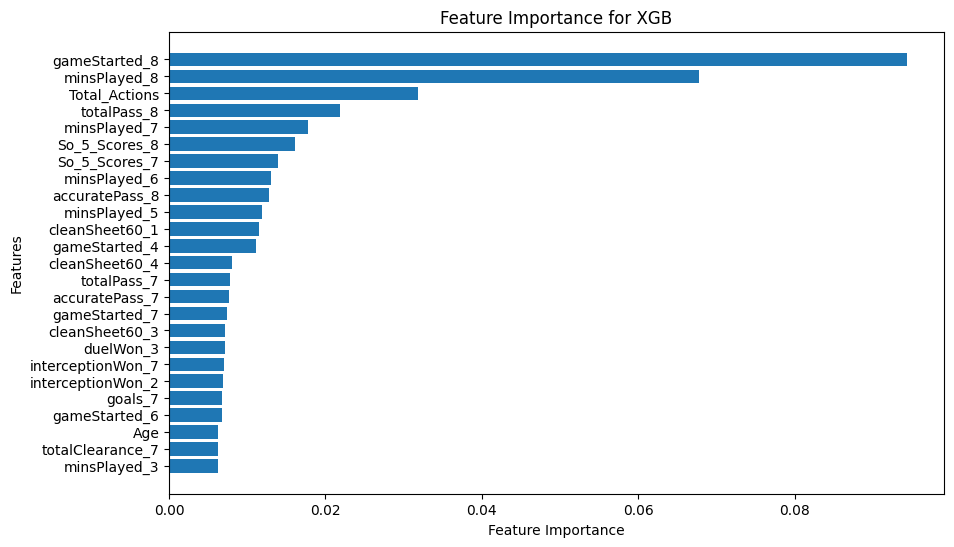

In [21]:
import matplotlib.pyplot as plt


# Get feature importances
importances = xgb_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

top_n = 25  # Number of top features to show
top_features = feature_importance_df.nlargest(top_n, 'Importance')

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for XGB')
plt.gca().invert_yaxis()
plt.show()

In [22]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

model1 = Ridge()
model2 = RandomForestRegressor()
model3 = SVR()

ensemble_model = VotingRegressor(estimators=[('ridge', model1), ('rf', model2), ('svr', model3)])
ensemble_model.fit(X_train, y_train)

y_pred_ens = ensemble_model.predict(X_test)

In [23]:
# Evaluate
mse = mean_squared_error(y_test, y_pred_ens)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 20.984137004731252
